In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

In [2]:
## import dataset
df = pd.read_csv('./data/exoplanets-clean.csv')

null_col_vals = df.isnull().sum().to_dict()
NUM_ROWS = df.shape[0]

thresholdAmount = 0.3 * NUM_ROWS

dropped = []
for key in null_col_vals:
    if(null_col_vals[key] >= thresholdAmount):
        dropped.append(key)

df = df.drop(columns=dropped, axis=1)
df = df.dropna()
df.head()
df.dtypes

num_stars                    int64
single_planet_exosystem       bool
discoverymethod             object
disc_year                    int64
disc_facility               object
                            ...   
sy_kmagerr1                float64
sy_kmagerr2                float64
sy_gaiamag                 float64
sy_gaiamagerr1             float64
sy_gaiamagerr2             float64
Length: 63, dtype: object

single_planet_exosystem_True
True     1674
False    1408
Name: count, dtype: int64
single_planet_exosystem_True
True     54.31538
False    45.68462
Name: count, dtype: float64


,discoverymethod,disc_facility,pl_bmassprov,st_metratio,single_planet_exosystem_False,single_planet_exosystem_True
30,Imaging,Gemini Observatory,Mass,[M/H],False,True
32,Radial Velocity,Lick Observatory,Mass,[Fe/H],True,False
35,Radial Velocity,McDonald Observatory,Mass,[Fe/H],True,False
52,Transit,Transiting Exoplanet Survey Satellite (TESS),Mass,[Fe/H],True,False
53,Transit,Transiting Exoplanet Survey Satellite (TESS),Mass,[Fe/H],True,False


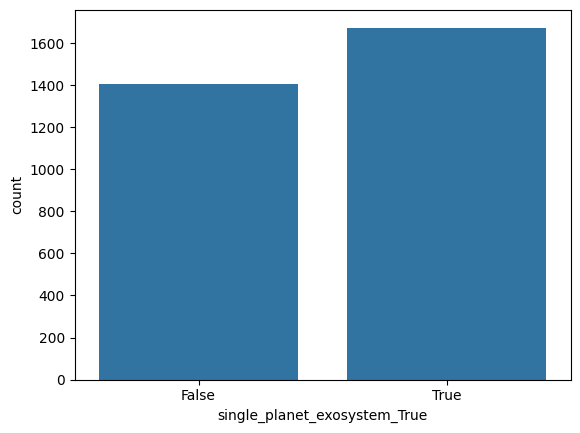

In [70]:
df_obj = df.select_dtypes(include='object').columns
selected_cols = list(df_obj) + ['single_planet_exosystem']
dummies = df[selected_cols]

dummies = pd.get_dummies(dummies, columns=['single_planet_exosystem'])
print(dummies['single_planet_exosystem_True'].value_counts())
print( (dummies['single_planet_exosystem_True'].value_counts()/ dummies['single_planet_exosystem_True'].value_counts().sum()) * 100)
sns.countplot(data=dummies, x='single_planet_exosystem_True')

dummies.head()


In [67]:
attr = dummies.drop('single_planet_exosystem_True', axis=1)
target = dummies['single_planet_exosystem_True']

# Split the data into training and testing sets
attr_train, attr_test, target_train, target_test = train_test_split(attr, target, test_size=0.3, random_state=7)

In [68]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(criterion='entropy', max_depth=3,max_leaf_nodes=5)

In [69]:
model.fit(attr_train,target_train)
target_pred = model.predict(attr_test)

ValueError: could not convert string to float: 'Transit'

In [62]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
print(f"\n Accuracy: {accuracy_score(target_test,target_pred)}  ")
print(f"\n Confusion Matrix:") 
print(confusion_matrix(target_test,target_pred))
print(f"\n Classification Report:")
print(classification_report(target_test,target_pred))


 Accuracy: 1.0  

 Confusion Matrix:
[[428   0]
 [  0 497]]

 Classification Report:
              precision    recall  f1-score   support

       False       1.00      1.00      1.00       428
        True       1.00      1.00      1.00       497

    accuracy                           1.00       925
   macro avg       1.00      1.00      1.00       925
weighted avg       1.00      1.00      1.00       925

